## Problem 2.3 - Multinomial Logistic Regression - Application

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from matplotlib.colors import LinearSegmentedColormap

In [35]:
# truncate the colormap RdPu
truncated_RdPu = LinearSegmentedColormap.from_list('truncated_RdPu', plt.cm.RdPu(np.linspace(0.3, 0.8, 100))) 


#### a) Generate data and train one with linear and one with logistic regression

In [36]:
# Generate data and split data into training and test sets
X, y = make_blobs(n_samples = 100, centers = 2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# train with linear regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

y_pred_linear_class = np.where(y_pred_linear >= 0.5, 1, 0)  # Convert to binary predictions

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [38]:
# train with logistic regression
logistic_reg = LogisticRegression(max_iter = 200)
logistic_reg.fit(X_train, y_train)
y_pred_logistic = logistic_reg.predict(X_test)

In [ ]:
# compare the two methods by providing error on the test set
linear_error = np.mean((y_test - y_pred_linear)**2)
linear_class_error = np.mean(y_test - )
logistic_error = np.mean(y_test != y_pred_logistic)
print(f"Mean Squared Error (Linear Regression): {linear_error}")
print(f"Classification Error (Logistic Regression): {logistic_error}")

Mean Squared Error (Linear Regression): 0.00976988233139663
Classification Error (Logistic Regression): 0.0


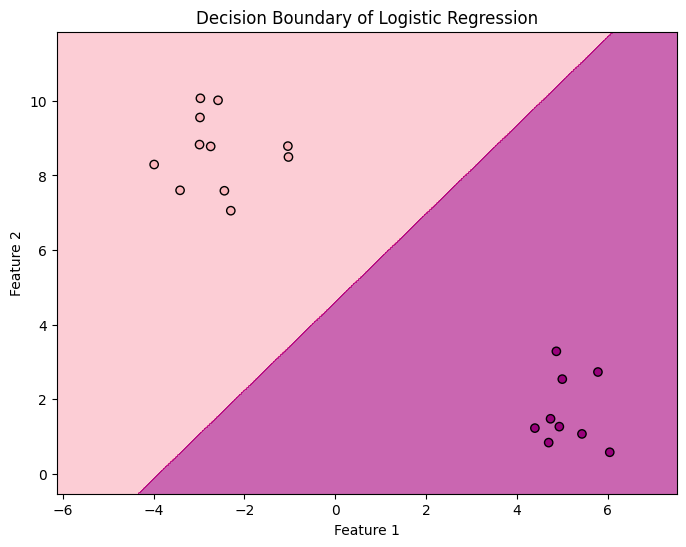

In [56]:
# plot decision boundary of a method for logistic regression
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = logistic_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha = 0.6, cmap = truncated_RdPu)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, edgecolors = 'k', cmap = truncated_RdPu)
plt.title("Decision Boundary of Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()    

#### b) generate data with four labels and train logistic regression

In [ ]:
# generating data with four labels
X_multi, y_multi = make_blobs(n_samples = 200, centers = 4, random_state = 42)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size = 0.2, random_state = 42)

In [60]:
# train logistic regression with different regularization parameters C
C_values = [0.01, 0.1, 1, 10, 100]
for C in C_values:
    logistic_reg_multi = LogisticRegression(C = C, max_iter = 200)
    logistic_reg_multi.fit(X_train_multi, y_train_multi)
    y_pred_multi = logistic_reg_multi.predict(X_test_multi)
    multi_error = np.mean(y_test_multi != y_pred_multi)
    print(f"Classification Error (Logistic Regression with C={C}): {multi_error}")  

Classification Error (Logistic Regression with C=0.01): 0.0
Classification Error (Logistic Regression with C=0.1): 0.0
Classification Error (Logistic Regression with C=1): 0.0
Classification Error (Logistic Regression with C=10): 0.0
Classification Error (Logistic Regression with C=100): 0.0


In [ ]:
# test different values of cluster_std in make_blobs
